<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/MstatLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from scipy.stats import gamma
import random
import math

In [63]:
# 1

N = 50000
a, b = 10., 1.5

n = 100
div = np.zeros(N)

for i in range(n):
  s = gamma.rvs(b, scale = 1/a, size = N)
  for i in range(1,N):
    s[i] = s[i] + s[i - 1]
  for i in range(1,N):
    s[i] = s[i]/i 
  for i in range(N):
    div[i] += abs(b / a - s[i])

for i in range(1, N):
    div[i] = div[i] / n
    div[i] = abs(div[i] - 1/(i**(1 / 2)))

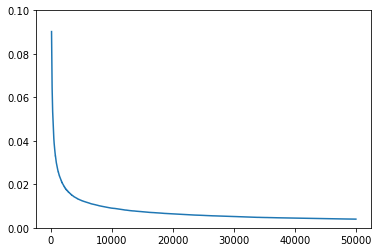

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_ylim([0.0, 0.1])

plt.plot(range(100,N), div[100:N])
plt.show() #сходимость к 0 разницы усредненной погрешности 
           #и 1/sqrt(n)

In [65]:
# 2

from scipy.stats import norm

N = 2000
numbers_in_formula = list()
 
for i in range(N):
  random_numbers = list()
  for i in range(N):
    random_numbers.append(gamma.rvs(b, scale = 1/a))
 
  expected_value = b / a
  variance = b / a / a
  numbers_in_formula.append((sum(random_numbers) 
  - N * expected_value) / math.sqrt(N * variance))



Среднее отклонение:  0.01265029167264178


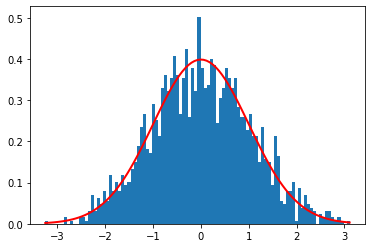

In [79]:
sr_otkl = 0

for i in range(1, N):
  sr_otkl = sr_otkl + (numbers_in_formula[i] - 1/( np.sqrt(2 * np.pi)) *np.exp( - (i)**2 / 2))

sr_otkl = sr_otkl / (N - 1)
print('Среднее отклонение: ', sr_otkl)

count, bins, ignored = plt.hist(numbers_in_formula, 100, density=True)
plt.plot(bins, 1/( np.sqrt(2 * np.pi)) *
np.exp( - (bins)**2 / 2 ),
linewidth=2, color='r')
plt.show()

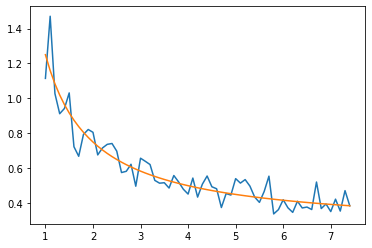

In [85]:
#3
from scipy.stats import poisson 
from scipy.stats import uniform
from numpy import arange
import statistics 

def exp_Func(l):
  return 1/4 + 1/l

def GenerateStats(l, n):
  new = []
  for i in range(n):
    N = poisson.rvs(l*10)
    lst = []
    for j in range(N):
      lst.append(uniform.rvs(loc = 0, scale = 10))
    lst = np.sort(lst)
    if lst[0] < 0.5 and lst[1] >= 0.5:
      new.append(lst[1] - lst[0])
  return new

a, b, n = 1, 7.5, 100
x = []
y = []
exp_value = []
for l in arange(a, b, 0.1):
  x.append(l)
  lst = GenerateStats(l, n)
  exp_value.append(statistics.mean(lst))
  y.append(exp_Func(l))

fig, ax = plt.subplots()
ax.plot(x, exp_value)
ax.plot(x, y)